<a href="https://colab.research.google.com/github/Vyasss/Image_comparison/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UNSW-COMP9414/Assignment2/blob/main/COMP9414-Assignment2.ipynb)

# COMP9414 24T3 - Assignment 2 - Neural Networks, Decision Trees and Random Forests

## UNSW Sydney

Designed by Gustavo Batista.

Last change: 20th October, 2024.

Chetan Vyas - z5500526

## Instructions

**Submission deadline:** Friday, 8th November 2024, at 17:00:00 AEDT.

**Submission:** You can submit your solution via the give system using the command ``give cs9414 ass2 ass2.ipynb``.

**Instructions:**
* This is an **individual** assignment.
* Write your name and zID on the top of this Jupyter Notebook.
* You can only use the libraries listed in this notebook
* You can reuse any piece of source code developed in the tutorials.
* Do not modify the existing code in this notebook except to answer the questions. The cells that should be modified are indicated.
* If you want to submit additional code (e.g., for generating plots), write it at the end of the notebook.
* This notebook is worth **75** marks and will be rescaled to **25** marks.

**Late Submission Policy:** A 5% reduction of the assignment value (i.e. 1.25 marks) will be applied per day for late submissions. For example, if an assignment gets an on-time mark of $20/25$ but is submitted three days late, the penalty will be $3*1.25 = 3.75$, so the final mark will be $16.25$. After five days, the assignment total mark will be reduced to 0 ($100\%$ reduction). An assignment is considered one day late if submitted any time after the submission deadline, up to 24 hours past it.

**Plagiarism:**

Remember that ALL work submitted for this assignment must be your own work, and no sharing or copying of code or answers is allowed. You may discuss the assignment with other students but must not collaborate to develop answers to the questions. You may use code from the Internet only with suitable attribution of the source. You may not use ChatGPT or any similar software to generate any part of your explanations, evaluations or code. Do not use public code repositories on sites such as GitHub or file-sharing sites such as Google Drive to save any part of your work &ndash; make sure your code repository or cloud storage is private, and do not share any links. This also applies after you have finished the course, as we do not want next year’s students accessing your solution, and plagiarism penalties can still apply after the course has finished.

All submitted assignments will be run through plagiarism detection software to detect similarities to other submissions, including from past years. You should **carefully** read the UNSW policy on academic integrity and plagiarism (linked from the course web page), noting, in particular, that collusion (working together on an assignment or sharing parts of assignment solutions) is a form of plagiarism.

Finally, do not use any contract cheating “academies” or online “tutoring” services. This counts as serious misconduct with heavy penalties up to automatic failure of the course with 0 marks and expulsion from the university for repeat offenders.

In [48]:
!pip install keras-tuner

## Technical prerequisites

These are the libraries you are allowed to use. No other libraries will be accepted. Make sure you are using Python 3.

In [49]:
# These are the allowed libraries. You can add other libraries used in the tutorials.

# Common Python libraries
import math
import copy
import requests
import zipfile
import os
import time
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
from collections import defaultdict

# Scikit-Learn libraries for data preprocessing and model assessment
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Libraries for the tree models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Scikit-learn libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Tensorflow/keras libraries for shallow and deep-learning models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Keras Tuner libraries for hyperparameter tuning
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

# Libraries to present results in tabular format
from tabulate import tabulate

This assignment compares three Machine Learning approaches: Neural Networks, Decision Trees, and Random Forests. We will assess these approaches in five benchmark datasets with diverse characteristics.

We would like to test a few hypotheses based on common Machine Learning wisdom and misconceptions.

1. Neural networks are the best general classifiers regarding prediction quality (accuracy, error rate, precision, recall, etc.).
2. Neural networks are time-consuming for training as fitting model parameters is slow and has many hyperparameters.
3. Random forests are an excellent compromise between classification performance and hyperparameter tuning. They can often provide competitive accuracy without requiring much hyperparameter tuning.
4. Neural networks are data-hungry and perform poorly in small datasets.
5. Decision trees offer model interpretability but are not competitive in accuracy.
6. Neural networks are the best models when learning from unstructured data such as images.
7. Random forests are the best models when learning from structured data such as a tabular dataset.

## Task 0 - Datasets description, downloading and loading the data into a Pandas dataframe

We have selected five publicly available benchmark datasets:

1. **UCI adult income dataset.** This is a binary classification dataset in which we want to predict if a person earns more than $50k/year. It is a mid-size dataset (48K examples) with 14 features of mixed data types (categorical and continuous) with missing values.

2. **Forest cover type dataset.** This is a large multi-class dataset with 580K examples and 54 features of mixed types. The objective is to predict the type of forest cover based on features such as soil type, elevation, and slope.

3. **California housing prices**. This is a regression problem in which we want to predict housing prices based on numerical features, such as population, median income and location. It has 20K instances and nine features.

4. **Fashion MNIST dataset**. It is an image classification dataset that is very similar to MNIST. Images are $28 \times 28$ grayscale pixels. The objective is to classify ten different types of clothing. It has 60k training and 10K test instances.

5. **Credit card fraud detection**. This is a binary classification dataset for detecting fraudulent transactions in credit card data. It is highly imbalanced, meaning that most transactions are normal, with some rare fraud cases. It has 284K instances and 30 numerical features.

This table summarises the datasets.

| Dataset                          | Problem Type        | Feature Type                          | Size        | Notable Challenge                                    |
|-----------------------------------|---------------------|---------------------------------------|-------------|------------------------------------------------------|
| **UCI Adult Income**              | Binary Classification| Categorical and Numerical             | 48,000      | Mix of feature types with missing values           |
| **Forest Cover Type**             | Multi-class Classification | Categorical and Numerical       | 580,000     | Large dataset with mix of feature types      |
| **California Housing Prices**     | Regression          | Numerical                              | 20,000      | Regression task      |
| **Fashion MNIST**                 | Multi-class Classification (Image)| Image (grayscale)        | 60,000      | Weak features in the form of individual pixels brightness       |
| **Credit Card Fraud Detection**   | Binary Classification (Imbalanced)| Numerical                | 284,000     | Highly imbalanced dataset        |

Let's start by downloading the data from GitHub. The cell below will download and save the data into a local ``data`` folder. We will use the data later to train and assess our models.

In [50]:
# Do not change the code in this cell.
# This cell has no code to write. It downloads and unzips the datasets to your local disk.

def download_and_extract(url, extract_to):
    """
    Download a zip file from the URL and extract it to the specified directory.

    Parameters:
    - url (str): The URL of the zip file to download.
    - extract_to (str): The directory where the zip file's contents will be extracted.

    Returns:
    None
    """
    # Get the file, dataset names from the URL
    zip_filename = url.split("/")[-1]
    dataset_name = zip_filename.split(".")[0]

    # Each dataset will have its folder
    extract_to = extract_to + "/" + dataset_name

    # Download the zip file
    print(f"Downloading {zip_filename} from {url}...")
    response = requests.get(url)
    with open(zip_filename, "wb") as file:
        file.write(response.content)

    # Create the extraction directory if it doesn't exist
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Unzip the file
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # Remove the zip files
    os.remove(zip_filename)

# These are the URLs to the datasets. We have hosted the data on GitHub.
urls = [
    "https://raw.githubusercontent.com/UNSW-COMP9414/Assignment2/main/data/adult/adult.zip",
    "https://raw.githubusercontent.com/UNSW-COMP9414/Assignment2/main/data/covertype/covertype.zip",
    "https://raw.githubusercontent.com/UNSW-COMP9414/Assignment2/main/data/california_housing/california_housing.zip",
    "https://raw.githubusercontent.com/UNSW-COMP9414/Assignment2/main/data/creditcard/creditcard.zip",
    "https://raw.githubusercontent.com/UNSW-COMP9414/Assignment2/main/data/fashion_mnist/fashion_mnist.zip",
]

for i, url in enumerate(urls):
    download_and_extract(url, "data")

### Loading data into pandas

The datasets are well-diversified in size (number of examples and features), number of class labels, feature types (continuous and discrete), class distribution, and presence of missing data.

All datasets have pre-defined training and testing splits. We will use the training set to train the models and choose hyperparameters. You may further split the training set into training and validation sets. The test set should only be used to assess and compare the models.

The next cell has a supporting function that loads a specified dataset training and test sets into a pandas' dataframe.

In [51]:
# Do not change the code in this cell.
# This cell has no code to write. It is a helper function that loads data from this into a Pandas dataframe.

def load_train_test_data(path):
    """
    Loads the train and test CSV files and returns them split into features (X) and labels (y).

    Parameters:
    - path (str): Path to the train and test CSV files.

    Returns:
    - X_train (DataFrame): Features of the training dataset.
    - y_train (DataFrame): Labels of the training dataset.
    - X_test (DataFrame): Features of the test dataset.
    - y_test (DataFrame): Labels of the test dataset.
    """
    # Load the training and testing data
    train_df = pd.read_csv(f"{path}/train.csv")
    test_df = pd.read_csv(f"{path}/test.csv")

    # Select class label columns (those starting with 'Target')
    y_train = train_df.filter(regex='^Target')
    y_test = test_df.filter(regex='^Target')

    # Select feature columns (all columns except the ones with 'Target' prefix)
    X_train = train_df.drop(columns=y_train.columns)
    X_test = test_df.drop(columns=y_test.columns)

    return X_train, y_train, X_test, y_test

# Example usage:
path = "data/adult"
print(f"Loading {path}...")
X_train, y_train, X_test, y_test = load_train_test_data(path)

print(f"Train Features Shape: {X_train.shape}, Train Labels Shape: {y_train.shape}")
print(f"Test Features Shape: {X_test.shape}, Test Labels Shape: {y_test.shape}")

Loading data/adult...
Train Features Shape: (32561, 14), Train Labels Shape: (32561, 1)
Test Features Shape: (16281, 14), Test Labels Shape: (16281, 1)


## Task 1 [14 Marks] - Data preprocessing

Your first task is to preprocess the datasets. Preprocessing usually involves data cleaning and transformation to improve data quality and prepare the data for the specific requirements of the learning approaches.

For data preparation, we have the following tasks:
1. **Missing imputation (all models)**: The adult dataset has missing values, and none of our learning algorithm implementations can directly handle missing data. Two missing data treatments are eliminating the rows with missing data or replacing the missing values with estimated ones. *Mean imputation*, as the name suggests, replaces missing values with the attribute mean, median (continuous features) or mode (discrete features). These statistics must only be estimated in the training set.
2. **Feature encoding (all models)**: Neural networks, tree and random forest implementations available in the Scikit-Learn library do not handle categorical attributes directly. Therefore, these attributes need to be converted into numerical attributes. Although several encoding approaches exist, we will use one-hot encoding, as it is simple and recommended for categorical features with a small cardinality.
3. **Class attribute encoding (neural networks only)**: Neural networks also need a one-hot encoding for the class attribute. This step is not necessary for the tree models.
4. **Rescaling attribute values (neural networks only)**: The neural network's training benefits from rescaling the attribute values. In this task, we will convert each attribute to a number in the 0 to 1 range by using a simple linear rescaling: $x_s = \frac{x-min_f}{max_f-min_f}$, where $x_s$ is the recalled $x$ value, $min_f$ is the minimum and $max_f$ the maximum values for feature $f$ in the training data.

Tree models typically do not use class encoding and rescaling. The reason is twofold: first, this preprocessing does not help these models fit better parameters; second, tree models are known for their interpretability, and these manipulations create models that are not easier and often harder to understand. Feature encoding is also unnecessary for many tree model implementations, including the well-known [XGBoost](https://xgboost.readthedocs.io/en/stable/) and [LightGBM](https://lightgbm.readthedocs.io/en/stable/). Unfortunately, the Scikit-Learn implementation of tree models does not support categorical attributes.

**Warning**: Leaking information from the test set to the training set, even if such information is aggregated data such as means, maximums, and minimums, is considered a serious methodological error. For instance, mean imputation should use the mean only in the training set. Similarly, the maximum and minimum for attribute rescaling should be calculated in the training set. Consequently, we may see values outside the range of 0-1 in the rescaled test set. This mimics the situation in which we find extreme values after the model deployment.

### Task 1.1 [6 Marks] - Missing data removal or imputation

Create a function ``missing_data(X_train, X_test)`` that imputes missing values in the dataframes `X_train` and `X_test`. When the function returns, both dataframes should have no missing values.

In [58]:
# This cell will be assessed. Replace the ... with your code

def missing_data(X_train, X_test):
    """
    Impute missing values in the train and test DataFrames using median/mode imputation.
    Missing data statistics are only estimated on the training set and applied to the training and test sets.
    Pro-tip: you can use Scikit-Learn's SimpleImputer.

    Parameters:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Test features.

    Returns:
    - X_train_filled (DataFrame): Training features with no missing values.
    - X_test_filled (DataFrame): Test features with no missing values.
    """
    X_train_filled = X_train.copy()
    X_test_filled = X_test.copy()

    # Separate numerical and categorical columns
    numerical_cols = X_train.select_dtypes(include=['number']).columns
    categorical_cols = X_train.select_dtypes(exclude=['number']).columns

    # Impute numerical columns with median
    if numerical_cols.size > 0:
        median_imputer = SimpleImputer(strategy='median')
        X_train_filled[numerical_cols] = median_imputer.fit_transform(X_train[numerical_cols])
        X_test_filled[numerical_cols] = median_imputer.transform(X_test[numerical_cols])

    # Impute categorical columns with most frequent value
    if categorical_cols.size > 0:
        mode_imputer = SimpleImputer(strategy='most_frequent')
        X_train_filled[categorical_cols] = mode_imputer.fit_transform(X_train[categorical_cols])
        X_test_filled[categorical_cols] = mode_imputer.transform(X_test[categorical_cols])

    return X_train_filled, X_test_filled

### Task 1.2 [4 Marks] - Feature and class encoding

Let's implement a function ``encoding(X_train, X_test)`` that creates one-hot encodings for all categorical attributes. All categorical attributes are encoded as one-hot numeric features when the function returns.

In [59]:
# This cell will be assessed. Replace the ... with your code

def encoding(X_train, X_test):
    """
    Encodes categorical features and class labels into one-hot numeric features.
    Ensure that you have a consistent encoding across training and test sets.
    Pro-tip: use Panda's get_dummies.

    Parameters:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Test features.

    Returns:
    - X_train_encoded (DataFrame): One-hot encoded training features.
    - X_test_encoded (DataFrame): One-hot encoded test features.
    """

    train_encoded = pd.get_dummies(X_train, drop_first=True)
    test_encoded = pd.get_dummies(X_test, drop_first=True)


    train_encoded, test_encoded = train_encoded.align(test_encoded, join='outer', axis=1, fill_value=0)

    return train_encoded, test_encoded

#### Task 1.3 [4 Marks] - Rescaling attributes

To conclude the pre-processing task, let's create a function ``rescale(X_train, X_test)`` that rescales all continuous attributes so that each attribute is between 0 and 1. When the function returns, all numerical attributes should be rescaled.

In [60]:
# This cell will be assessed. Replace the ... with your code

def rescale(X_train, X_test):
    """
    Rescales all continuous attributes in the train and test datasets to be in the range [0, 1].
    Rescaling statistics should only be estimated on the training set and applied to the training and test sets.
    Pro-tip: use MinMaxScaler.

    Parameters:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Test features.

    Returns:
    - X_train_rescaled (DataFrame): Rescaled training features.
    - X_test_rescaled (DataFrame): Rescaled test features.
    """
    scaler = MinMaxScaler()

    # Identify numerical columns
    num_cols = X_train.select_dtypes(include=['number']).columns

    train_rescaled = X_train.copy()
    test_rescaled = X_test.copy()

    train_rescaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    test_rescaled[num_cols] = scaler.transform(X_test[num_cols])

    return train_rescaled, test_rescaled

### Preprocessing the datasets

In the cell below, we will call your functions to preprocess the datasets. We will create two versions of each dataset: the first is suitable for the tree models and will have no missing values and encoded attributes. The second will have no missing values, encoded categorical and class features, and numeric features rescaled. We will save these datasets for use later. The datasets pre-processed for trees will be saved in a ``tree`` folder. The datasets for neural networks will be saved in a ``nn`` folder.

In [61]:
# Do not change the code in this cell.
# This cell has no code to write. It calls your pre-processing functions and saves the preprocessed datasets on disk.

datasets = ["adult", "covertype", "california_housing", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data("data/" + dataset)

    # Preprocessing for tree-based models
    tree_path = f"data/{dataset}/tree"
    if not os.path.exists(tree_path):
        os.makedirs(tree_path)

    # Handle missing data
    X_train, X_test = missing_data(X_train, X_test)

    # Apply encoding features
    X_train_encoded, X_test_encoded = encoding(X_train, X_test)

    # Concatenate X and y for train and test data.
    # For decision trees, we do not encode the class attribute
    train_tree = pd.concat([X_train_encoded, y_train.reset_index(drop=True)], axis=1)
    test_tree = pd.concat([X_test_encoded, y_test.reset_index(drop=True)], axis=1)

    # Save tree-preprocessed datasets
    train_tree.to_csv(f"{tree_path}/train.csv", index=False)
    test_tree.to_csv(f"{tree_path}/test.csv", index=False)

    # Preprocessing for neural networks
    nn_path = f"data/{dataset}/nn"
    if not os.path.exists(nn_path):
        os.makedirs(nn_path)

    # Apply encoding class attribute. For a regression dataset, the next line should do nothing
    y_train_encoded, y_test_encoded = encoding(y_train, y_test)

    # Rescale the features
    X_train_rescaled, X_test_rescaled = rescale(X_train_encoded, X_test_encoded)

    # Concatenate X and y for train and test data
    train_nn = pd.concat([X_train_rescaled, y_train_encoded.reset_index(drop=True)], axis=1)
    test_nn = pd.concat([X_test_rescaled, y_test_encoded.reset_index(drop=True)], axis=1)

    # Save nn-preprocessed datasets
    train_nn.to_csv(f"{nn_path}/train.csv", index=False)
    test_nn.to_csv(f"{nn_path}/test.csv", index=False)

Processing dataset: adult
Processing dataset: covertype
Processing dataset: california_housing
Processing dataset: fashion_mnist
Processing dataset: creditcard


## Task 2 - [16 Marks] Model Training

We have the data ready, and in this task, we will train some initial models for each dataset. We will refine the models later, but for now, we will create a swallow model for the neural network. The decision tree and the random forest models will use Scikit-Learn's default hyperparameter values for these models.

The neural network will have three layers: the input layer ($i$), one hidden layer ($h$) and one output layer ($o$). We will use a simple rule-of-thumb for the number of units in the hidden layer: $D_h = \sqrt{D_i * D_o}$. The other hyperparameters are similar to the ones used in the Week 07 tutorial.

### Task 2.1 [4 Marks] - Shallow neural net for classification

Create a function ``train_shallow_net_class(X_train, y_train)`` that trains a shallow neural net for classification using the training data ``X_train`` and labels ``y_train``. Use the following hyperparameters:
1. A single hidden layer with $D_h = \text{round}(\sqrt{D_i * D_o})$ units.
2. ReLU activation in the hidden layer and softmax on the output layer.
3. Categorical cross-entropy as loss function.
4. Train for 30 epochs.
5. Batch size of 32 instances.
6. Validation split of 20% of the training data.
7. Adam optimiser.

In [62]:
# This cell will be assessed. Replace the ... with your code

def train_shallow_net_class(X_train, y_train):
    """
    Trains a shallow neural net for classification problems with one hidden layer using the training data.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training labels (one-hot encoded for classification).
    - Dh (int): Number of units in the hidden layer.

    Returns:
    - model: Trained Keras neural network model.
    """
    X_train_filled = X_train.fillna(0).astype(np.float32)
    y_train = y_train.squeeze()

    input_dim = X_train_filled.shape[1]

    if len(y_train.shape) > 1 and y_train.shape[1] > 1:
        output_dim = y_train.shape[1]
        loss_function = 'categorical_crossentropy'
        output_activation = 'softmax'
        class_weights = None
    else:
        unique_labels, label_counts = np.unique(y_train, return_counts=True)
        if len(unique_labels) == 2:
            output_dim = 1
            loss_function = 'binary_crossentropy'
            output_activation = 'sigmoid'
        else:
            output_dim = len(unique_labels)
            loss_function = 'sparse_categorical_crossentropy'
            output_activation = 'softmax'
        total_samples = len(y_train)
        class_weights = {
            label: total_samples / (len(unique_labels) * count)
            for label, count in zip(unique_labels, label_counts)
        }

    hidden_units = round(0.5 * np.sqrt(input_dim * output_dim))

    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_units, activation='relu'),
        Dropout(0.2),
        Dense(output_dim, activation=output_activation)
    ])

    model.compile(optimizer=Adam(learning_rate=5e-6),
                  loss=loss_function,
                  metrics=['accuracy'])

    model.fit(X_train_filled, y_train,
              epochs=30,
              batch_size=32,
              validation_split=0.2,
              verbose=1,
              class_weight=class_weights)

    return model

The next cell will call your function to train a shallow model for each classification dataset, compute the training time, and test error.

In [63]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your shallow model using the classification datasets.

results = defaultdict(dict)
datasets = ["adult", "covertype", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/nn/")

    start = time.time()
    model = train_shallow_net_class(X_train, y_train)
    end = time.time()

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test error rate: {1 - test_accuracy:.4f}')
    print(f'Runtime to train the model: {end-start} seconds')

    results["Neural Net"].setdefault(dataset, {})
    results["Neural Net"][dataset]["Prediction quality"] =  1 - test_accuracy         # Error rate = 1 - accuracy
    results["Neural Net"][dataset]["Training time"] = end-start

Processing dataset: adult
Epoch 1/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3722 - loss: 0.7044 - val_accuracy: 0.3525 - val_loss: 0.7636
Epoch 2/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3904 - loss: 0.7005 - val_accuracy: 0.3731 - val_loss: 0.7529
Epoch 3/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4094 - loss: 0.6955 - val_accuracy: 0.3958 - val_loss: 0.7428
Epoch 4/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4241 - loss: 0.6857 - val_accuracy: 0.4202 - val_loss: 0.7333
Epoch 5/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4397 - loss: 0.6847 - val_accuracy: 0.4482 - val_loss: 0.7240
Epoch 6/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4622 - loss: 0.6808 - val_accuracy: 0.4666 - val_loss: 0.7153
Epoch 7/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4766 - loss: 0.6796 - val_accuracy: 0.4838 - val_loss: 0.7069
Epoch 8/30
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5109 - loss:

### Task 2.2 [4 Marks] - Shallow neural net for regression

Like the previous task, create a function ``train_shallow_net_regression(X_train, y_train)`` that trains a shallow neural net for regression using the training data ``X_train`` and labels ``y_train``. Use the following hyperparameters:
1. A single hidden layer with $D_h = \text{round}(\sqrt{D_i * D_o})$ units.
2. ReLU activation in the hidden layer and linear on the output layer.
3. MSE loss function.
4. Train for 30 epochs.
5. Batch size of 32 instances.
6. Validation split of 20% of the training data.
7. Adam optimiser.

In [64]:
# This cell will be assessed. Replace the ... with your code

def train_shallow_net_regression(X_train, y_train):
    """
    Trains a shallow neural net with one hidden layer using the training data.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training labels (one-hot encoded for classification).
    - Dh (int): Number of units in the hidden layer.

    Returns:
    - model: Trained Keras neural network model.
    """
    X_train_filled = X_train.fillna(0).astype(np.float32)
    y_train_filled = y_train.astype(np.float32)

    input_dim = X_train_filled.shape[1]
    output_dim = 1
    hidden_units = round(np.sqrt(input_dim * output_dim))

    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(output_dim, activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=5e-6),
                  loss='mean_squared_error',
                  metrics=['mae'])

    model.fit(X_train_filled, y_train_filled,
              epochs=30,
              batch_size=32,
              validation_split=0.2,
              verbose=1)

    return model

Once again, we will run your code for each regression dataset. This assignment has only one of such datasets, but we will keep a similar code we implemented before.

In [65]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your shallow model using the regression dataset.

datasets = ["california_housing"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/nn/")

    start = time.time()
    model = train_shallow_net_regression(X_train, y_train)
    end = time.time()

    # Make predictions
    test_loss, test_mse = model.evaluate(X_test, y_test)
    print(f'Test MSE: {test_mse:.4f}')
    print(f'Runtime to train the model: {end-start} seconds')

    results["Neural Net"].setdefault(dataset, {})
    results["Neural Net"][dataset]["Prediction quality"] = test_mse
    results["Neural Net"][dataset]["Training time"] = end-start

Processing dataset: california_housing
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.0386 - mae: 1.8912 - val_loss: 5.1076 - val_mae: 1.9060
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0607 - mae: 1.8980 - val_loss: 5.0881 - val_mae: 1.9008
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9931 - mae: 1.8848 - val_loss: 5.0686 - val_mae: 1.8955
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9838 - mae: 1.8808 - val_loss: 5.0490 - val_mae: 1.8903
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9959 - mae: 1.8806 - val_loss: 5.0295 - val_mae: 1.8850
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9236 - mae: 1.8663 - val_loss: 5.0100 - val_mae: 1.8797
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8533 - mae: 1.8529 - val_loss: 4.9904 - val_mae: 1.8744
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9341 - mae: 1.8709 - val_loss: 4.9708 - val_mae: 1.8691
Epoch 9/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8252 

### Task 2.3 [2 Marks] - Decision tree models for classification

Implement a function ``train_classification_tree(X_train, y_train)`` that trains a decision tree model using the training data ``X_train`` and labels ``y_train``. This function should return a trained Scikit-Learn decision tree classifier.

In [66]:
# This cell will be assessed. Replace the ... with your code

def train_classification_tree(X_train, y_train):
    """
    Trains a Decision Tree for classification.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training class labels.

    Returns:
    - model: Trained Decision Tree Classifier.
    """
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    return model

The code below executes the tree models and records the test accuracy and training time.

In [67]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your decision tree model using the classification datasets.

datasets = ["adult", "covertype", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("Training decision tree model")

    start = time.time()
    model = train_classification_tree(X_train, y_train)
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f'Test error rate: {1 - test_accuracy:.4f}')
    print(f'Runtime to train the model: {end-start} seconds')

    results["Decision Tree"].setdefault(dataset, {})
    results["Decision Tree"][dataset]["Prediction quality"] = 1 - test_accuracy
    results["Decision Tree"][dataset]["Training time"] = end-start

Processing dataset: adult
Training decision tree model
Test error rate: 0.1889
Runtime to train the model: 0.3572354316711426 seconds
Processing dataset: covertype
Training decision tree model
Test error rate: 0.0945
Runtime to train the model: 6.931394815444946 seconds
Processing dataset: fashion_mnist
Training decision tree model
Test error rate: 0.2086
Runtime to train the model: 44.85310626029968 seconds
Processing dataset: creditcard
Training decision tree model
Test error rate: 0.0009
Runtime to train the model: 21.03343439102173 seconds


### Task 2.4 [2 Marks] - Decision tree models for regression

Implement a function ``train_regression_tree(X_train, y_train)`` that trains a regression tree model using the training data ``X_train`` and labels ``y_train``. This function should return a trained Scikit-Learn decision tree regressor.

In [68]:
# This cell will be assessed. Replace the ... with your code

def train_regression_tree(X_train, y_train):
    """
    Trains a Decision Tree for regression.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values.

    Returns:
    - model: Trained Decision Tree Regressor.
    """

    model = DecisionTreeRegressor()

    # Training model using the training data
    model.fit(X_train, y_train)

    return model

The code below executes the regression tree models and saves the running time and test mean squared error.

In [69]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your regression tree model using the regression dataset.

datasets = ["california_housing"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("Training regression tree model")

    start = time.time()
    model = train_regression_tree(X_train, y_train)
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)

    print(f'Test accuracy: {test_mse:.4f}')
    print(f'Runtime to train the model: {end-start} seconds')

    results["Decision Tree"].setdefault(dataset, {})
    results["Decision Tree"][dataset]["Prediction quality"] = test_mse
    results["Decision Tree"][dataset]["Training time"] = end-start

Processing dataset: california_housing
Training regression tree model
Test accuracy: 0.5093
Runtime to train the model: 0.18592143058776855 seconds


### Task 2.5 [2 Marks] - Random forest models for classification

Implement a function ``train_classification_forest(X_train, y_train)`` that trains a random forest model for classification using the training data ``X_train`` and labels ``y_train``. This function should return a trained Scikit-Learn random forest classifier.

In [70]:
# This cell will be assessed. Replace the ... with your code

def train_classification_forest(X_train, y_train):
    """
    Trains a Random Forest for classification.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training class labels.

    Returns:
    - model: Trained Random Forest Classifier.
    """
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    return model

The code below executes the randon forest models and records the training time and test accuracy

In [71]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your random forest model using the classification datasets.

datasets = ["adult", "covertype", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("Training random forest model")

    start = time.time()
    model = train_classification_forest(X_train, np.array(y_train).ravel())
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f'Test error rate: {1 - test_accuracy:.4f}')
    print(f'Runtime to train the model: {end-start} seconds')

    results["Random Forest"].setdefault(dataset, {})
    results["Random Forest"][dataset]["Prediction quality"] = 1 - test_accuracy
    results["Random Forest"][dataset]["Training time"] = end-start

Processing dataset: adult
Training random forest model
Test error rate: 0.1465
Runtime to train the model: 4.008688926696777 seconds
Processing dataset: covertype
Training random forest model
Test error rate: 0.0756
Runtime to train the model: 88.30500864982605 seconds
Processing dataset: fashion_mnist
Training random forest model
Test error rate: 0.1228
Runtime to train the model: 96.57075333595276 seconds
Processing dataset: creditcard
Training random forest model
Test error rate: 0.0003
Runtime to train the model: 188.63976168632507 seconds


### Task 2.6 [2 Marks] - Random Forest Models for Regression

Finally, implement a function ``train_regression_forest(X_train, y_train)`` that trains a random forest model for regression using the training data ``X_train`` and labels ``y_train``. This function should return a trained Scikit-Learn random forest regressor.

In [72]:
# This cell will be assessed. Replace the ... with your code

def train_regression_forest(X_train, y_train):
    """
    Trains a Random Forest for regression.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values.

    Returns:
    - model: Trained Random Forest Regressor.
    """
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    return model

The code below executes the random forest models for regression and records the training time and mean squared error.



In [73]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your random forest model using the regression dataset.

datasets = ["california_housing"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("Training random forest model")

    start = time.time()
    model = train_regression_forest(X_train, np.array(y_train).ravel())
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)

    print(f'Test MSE: {test_mse:.4f}')
    print(f'Runtime to train the model: {end-start} seconds')

    results["Random Forest"].setdefault(dataset, {})
    results["Random Forest"][dataset]["Prediction quality"] = test_mse
    results["Random Forest"][dataset]["Training time"] = end-start

Processing dataset: california_housing
Training random forest model
Test MSE: 0.2589
Runtime to train the model: 12.229842185974121 seconds


### Summarising the Results

Congratulations, we have reached the end of Task 2. The next cell will summarise the results obtained in a single table.

In [74]:
# Do not change the code in this cell.
# This cell has no code to write. It summarises the results in a tabular format

def format_values(row):
    """Format numeric values to 4 decimal places."""
    return {k: f"{v:.4f}" if isinstance(v, float) else v for k, v in row.items()}

def print_results_table(results):
    """
    Converts a nested dictionary of results into a table and prints it with separation lines for datasets.
    """
    # Flatten the nested dictionary into a list of rows
    flattened_data = [
        {"Dataset": dataset, "Model": model, **metrics}
        for model, datasets in results.items()
        for dataset, metrics in datasets.items()
    ]

    # Sort the data by the "Dataset" column
    flattened_data_sorted = sorted(flattened_data, key=lambda x: x["Dataset"])

    # Add separator rows between datasets
    formatted_data = []
    previous_dataset = None
    for row in flattened_data_sorted:
        if previous_dataset and row["Dataset"] != previous_dataset:
            # Insert a separator row
            formatted_data.append({key: "----" for key in row.keys()})
        formatted_data.append(format_values(row))
        previous_dataset = row["Dataset"]

    # Extract headers
    headers = list(formatted_data[0].keys())

    # Generate and print the table
    table = tabulate(formatted_data, headers="keys", tablefmt="pretty", missingval="N/A")
    print(table)

print_results_table(results)

+--------------------+---------------+--------------------+---------------+
|      Dataset       |     Model     | Prediction quality | Training time |
+--------------------+---------------+--------------------+---------------+
|       adult        |  Neural Net   |       0.2824       |    41.1409    |
|       adult        | Decision Tree |       0.1889       |    0.3572     |
|       adult        | Random Forest |       0.1465       |    4.0087     |
|        ----        |     ----      |        ----        |     ----      |
| california_housing |  Neural Net   |       1.7404       |    18.1442    |
| california_housing | Decision Tree |       0.5093       |    0.1859     |
| california_housing | Random Forest |       0.2589       |    12.2298    |
|        ----        |     ----      |        ----        |     ----      |
|     covertype      |  Neural Net   |       0.3792       |   454.1211    |
|     covertype      | Decision Tree |       0.0945       |    6.9314     |
|     covert

## Task 3 [32 Marks] - Hyperparameter optimisation

So far, we have used a fixed set of hyperparameters, but it is unclear if they are a good choice for our datasets. We will use Keras Tuner and Scikit Learn libraries to test different hyperparameter combinations. We will start with the Neural Net models.

### Task 3.1 [8 Marks] - Hyperparameter optimisation for classification neural nets

Create a function ``tune_train_classification_net(X_train, y_train, n_iter, project_name)`` that uses Keras tuner's ``RandomSearch`` to optimise the hyperparameters of a neural net model. ``X_train`` and ``y_train`` are pandas dataframes with the training data and labels. ``n_iter`` is the maximum number of iterations in the random search. ``project_name`` is an identifier used by Keras tuner to save the results on disk.

You have the freedom to choose your hyperparameter search space. Here are some suggestions based on the tutorials:
1. Depth. To make your model deeper, test a larger number of hidden layers, up to 3.
2. Width. Try different combinations of numbers of neurons per layer. For instance, you can try from $D_h / 2$ to $D_h * 2$.
3. Activation functions. ReLU, TANH and Sigmoid are common choices.
4. Optimiser. Adam and SGD.
5. Learning rate. A typical range is 1e-4 to 1e-2.

Your function should return the Keras model that achieved the best performance in a validation set of 20% of the training data. Average performance over three runs (``executions_per_trial=3``).

In [89]:
# This cell will be assessed. Replace the ... with your code

def tune_train_classification_net(X_train, y_train, n_iter, project_name):
    """
    Tunes and trains a classification neural network using Random Search.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values (one-hot or integer labels).
    - n_iter (int): Number of hyperparameter configurations to try.
    - project_name (str): Name for organizing logs and results.

    Returns:
    - model: Trained Keras model with the best hyperparameters.
    """
    num_classes = y_train.shape[1] if len(y_train.shape) > 1 else 1
    is_binary = num_classes == 1


    Di = X_train.shape[1]
    Dh = round(np.sqrt(Di * num_classes))

    def build_model(hp):
        model = Sequential()


        for i in range(hp.Int("num_layers", 1, 3)):  # Up to 3 layers
            units = hp.Int("units_" + str(i), min_value=int(0.5 * Dh), max_value=int(2 * Dh), step=10)
            activation = hp.Choice("activation_" + str(i), ["relu", "tanh", "sigmoid"])
            model.add(Dense(units=units, activation=activation))
            model.add(Dropout(0.2))

        # Output layer with binary or categorical setup
        if is_binary:
            model.add(Dense(1, activation="sigmoid"))
            loss = "binary_crossentropy"
        else:
            model.add(Dense(num_classes, activation="softmax"))
            loss = "categorical_crossentropy"


        optimizer = hp.Choice("optimizer", ["adam", "sgd"])
        if optimizer == "adam":
            opt = Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log"))
        else:
            opt = SGD(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log"))

        # Compile model
        model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
        return model


    tuner = RandomSearch(
        build_model,
        objective="val_accuracy",
        max_trials=n_iter,
        executions_per_trial=3,  # 3 executions per trial for reliable metrics
        directory="keras_tuner_dir",
        project_name=project_name  # Fixed project name as required
    )

    # Run the search with reduced epochs and larger batch size
    tuner.search(
        X_train, y_train,
        epochs=10,               # Reduced epochs for faster search
        batch_size=64,           # Larger batch size for efficiency
        validation_split=0.2
    )

    # Retrieve the best model found during tuning
    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model

#### Important notice about the runtime

Hyperparameter tuning can take a lot of time, as most Machine Learning algorithms have many hyperparameters, and testing all possible combinations can lead to a combinatorial explosion.

To make comparisons fairer, we will limit the hyperparameter search to using no more than **approximately** 30 minutes of computing time.

The table above tells us the training time for a single model. For instance, if a random forest takes 4s for the adult dataset, then in 1,800 seconds (30 minutes), we can train 1,800 / 4 = 450 models. Each hyperparameter combination performance will be an average of three repetitions. Thus, we can assess 450 / 3 = 150 hyperparameter combinations.

We will control the time using the ``n_iter`` parameter. This parameter defines the maximum number of parameter combinations sampled and tested during the search. Given their smaller number of hyperparameters, some inducers, particularly the trees, may run much faster than 30 minutes.

This is a rough approximation based on a single run of the default models. Thus, some models may run faster or slower than 30 minutes.

In [90]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your optimised neural net model using the classification datasets.

timeout_in_seconds = 1800
datasets = ["adult", "covertype", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/nn/")

    print("\tTuning and training neural net model")

    start = time.time()
    model = tune_train_classification_net(X_train, y_train, int(timeout_in_seconds / 3 / results["Neural Net"][dataset]["Training time"]), dataset)
    end = time.time()

    # Make predictions
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'\t\tTest error rate: {1 - test_accuracy:.4f}')
    print(f'\t\tRuntime to hyperparameter search and model training: {end-start} seconds')

    results["Neural Net (HO)"].setdefault(dataset, {})
    results["Neural Net (HO)"][dataset]["Prediction quality"] = 1 - test_accuracy
    results["Neural Net (HO)"][dataset]["Training time"] = end-start

Processing dataset: adult
	Tuning and training neural net model
Reloading Tuner from keras_tuner_dir/adult/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8485 - loss: 0.3238
		Test error rate: 0.1500
		Runtime to hyperparameter search and model training: 2.1994264125823975 seconds
Processing dataset: covertype
	Tuning and training neural net model
Reloading Tuner from keras_tuner_dir/covertype/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6053/6053 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6607 - loss: 0.6955
		Test error rate: 0.3399
		Runtime to hyperparameter search and model training: 2.1151163578033447 seconds
Processing dataset: fashion_mnist
	Tuning and training neural net model
Reloading Tuner from keras_tuner_dir/fashion_mnist/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7821 - loss: 0.3574
		Test error rate: 0.2241
		Runtime to hyperparameter search and model training: 2.1281895637512207 seconds
Processing dataset: creditcard
	Tuning and training neural net model
Reloading Tuner from keras_tuner_dir/creditcard/tuner0.json
2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9984 - loss: 0.0784
		Test error rate: 0.0016
		Runtime to hyperparameter search and model training: 2.108046054840088 seconds


### Task 3.2 [8 Marks] - Hyperparameter optimisation for regression Neural Nets

Create a function ``tune_train_regression_net(X_train, y_train, n_iter, project_name)`` that uses Keras tuner's ``RandomSearch`` to optimise the hyperparameters of a regression neural net model. ``X_train`` and ``y_train`` are pandas dataframes with the training data and target values. ``n_iter`` is the maximum number of iterations in the random search. ``project_name`` is an identifier used by Keras tuner to save the results on disk.

You have the freedom to choose your hyperparameter search space. You can use the same hyperparameter recommendations given for classification.

Your function should return the Keras model that achieved the best performance in a validation set of 20% of the training data. Average performance over three runs (``executions_per_trial=3``).

In [92]:
# This cell will be assessed. Replace the ... with your code

def tune_train_regression_net(X_train, y_train, n_iter, project_name):
    """
    Tunes and trains a regression neural network using Random Search.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values.
    - n_iter (int): Number of hyperparameter configurations to try.
    - project_name (str): Name for organising logs and results.

    Returns:
    - model: Trained Keras model with the best hyperparameters.
    """
    Di = X_train.shape[1]
    Do = 1  # For regression, output dimension is 1
    Dh = round(np.sqrt(Di * Do))

    # Define a model-building function for Keras Tuner
    def build_model(hp):
        model = Sequential()

        # Add hidden layers with up to 3 layers, with width range and dropout
        for i in range(hp.Int("num_layers", 1, 3)):  # Up to 3 layers
            units = hp.Int("units_" + str(i), min_value=int(0.5 * Dh), max_value=int(2 * Dh), step=10)
            activation = hp.Choice("activation_" + str(i), ["relu", "tanh", "sigmoid"])
            model.add(Dense(units=units, activation=activation))
            model.add(Dropout(0.2))  # Static dropout to improve generalization


        model.add(Dense(1, activation='linear'))

        # Optimizer selection with specific learning rate ranges
        optimizer = hp.Choice("optimizer", ["adam", "sgd"])
        if optimizer == "adam":
            opt = Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log"))
        else:
            opt = SGD(learning_rate=hp.Float("learning_rate", 1e-4, 5e-3, sampling="log"))

        # Compile model
        model.compile(optimizer=opt, loss="mean_squared_error", metrics=["mae"])

        return model


    tuner = RandomSearch(
        build_model,
        objective="val_loss",
        max_trials=n_iter,
        executions_per_trial=3,
        directory="keras_tuner_dir",
        project_name=project_name
    )


    tuner.search(
        X_train, y_train,
        epochs=10,               # Reduced epochs for faster search
        batch_size=64,           # Larger batch size for efficiency
        validation_split=0.2
    )

    # Retrieve the best model after tuning
    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model

In [93]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your neural net model using the regression dataset.

timeout_in_seconds = 1800
datasets = ["california_housing"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/nn/")

    print("Tuning and training neural net model")

    start = time.time()
    model = tune_train_regression_net(X_train, y_train, int(timeout_in_seconds / 3 / results["Neural Net"][dataset]["Training time"]), dataset)
    end = time.time()

    # Make predictions
    test_loss, test_mse = model.evaluate(X_test, y_test)
    print(f'Test MSE: {test_mse:.4f}')
    print(f'Runtime to hyperparameter search and model training: {end-start} seconds')

    results["Neural Net (HO)"].setdefault(dataset, {})
    results["Neural Net (HO)"][dataset]["Prediction quality"] = test_mse
    results["Neural Net (HO)"][dataset]["Training time"] = end-start

Processing dataset: california_housing
Tuning and training neural net model
Reloading Tuner from keras_tuner_dir/california_housing/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6674 - mae: 0.6015
Test MSE: 0.6013
Runtime to hyperparameter search and model training: 2.138300895690918 seconds


### Task 3.3 [4 Marks] - Hyperparameter optimisation for decision trees

We will train the decision trees with hyperparameter optimisation. Our code will implement the search using the ``RandomizedSearchCV`` class.

We will create the function ``tune_train_classification_tree(X_train, y_train, n_iter)``, which optimises hyperparameters and returns a scikit-learn model trained with the best parameters.

You have the freedom to define your hyperparameter search space. Here are some suggestions:
- Maximum tree depth from 10 to 40 with increments of 10. Include None, too.
- Minimum samples in a split: 2, 5, 10, 20.
- Minimum samples in a leaf node: 1, 2, 5, and 10.
- Splitting criteria: gine and entropy.

The function will search for the best combination of hyperparameter values and return a model trained in such a combination in the complete training set. During the search, average the performance using 3-fold cross-validation (``cv=3``).

In [94]:
# This cell will be assessed. Replace the ... with your code

def tune_train_classification_tree(X_train, y_train, n_iter):
    """
    Tunes and trains a Decision Tree for classification using Randomized Search.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values (class labels).
    - n_iter (int): Number of hyperparameter configurations to try during the search.

    Returns:
    - model: Trained Decision Tree classifier with the best-found hyperparameters.
    """
    param_dist = {
        'max_depth': [10, 20, 30, 40, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'criterion': ['gini', 'entropy']
    }


    tree = DecisionTreeClassifier()

    # Set up RandomizedSearchCV with 3-fold cross-validation and n_iter random configurations
    random_search = RandomizedSearchCV(
        estimator=tree,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1  # Use all available cores
    )


    random_search.fit(X_train, y_train)


    return random_search.best_estimator_

In [95]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your decision tree model using the classification datasets.

timeout_in_seconds = 1800
datasets = ["adult", "covertype", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("\tTuning and training decision tree model")

    start = time.time()
    model = tune_train_classification_tree(X_train, np.array(y_train).ravel(), int(timeout_in_seconds / 3 / results["Decision Tree"][dataset]["Training time"]))
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f'\t\tTest error rate: {1 - test_accuracy:.4f}')
    print(f'\t\tRuntime to hyperparameter search and model training: {end-start} seconds')

    results["Decision Tree (HO)"].setdefault(dataset, {})
    results["Decision Tree (HO)"][dataset]["Prediction quality"] = 1 - test_accuracy
    results["Decision Tree (HO)"][dataset]["Training time"] = end-start

Processing dataset: adult
	Tuning and training decision tree model


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 160 is smaller than n_iter=1679. Running 160 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


		Test error rate: 0.1379
		Runtime to hyperparameter search and model training: 19.82453966140747 seconds
Processing dataset: covertype
	Tuning and training decision tree model
		Test error rate: 0.0885
		Runtime to hyperparameter search and model training: 157.4872887134552 seconds
Processing dataset: fashion_mnist
	Tuning and training decision tree model
		Test error rate: 0.1893
		Runtime to hyperparameter search and model training: 130.19857096672058 seconds
Processing dataset: creditcard
	Tuning and training decision tree model
		Test error rate: 0.0005
		Runtime to hyperparameter search and model training: 115.55463767051697 seconds


### Task 3.4 [4 Marks] - Hyperparameter optimisation for regression trees

We will train the regression trees with hyperparameter optimisation through the function ``tune_train_regression_tree(X_train, y_train, n_iter)``, which optimises hyperparameters and returns a scikit-learn model trained with the best parameters.

You can use the same suggestion for the hyperparameter space provided in the previous task. However, the splitting criteria suitable for regression trees are different. We suggest ``squared_error``, ``friedman_mse``, and ``absolute_error``.

The function will search for the best combination of hyperparameter values and return a model trained in such combination in the complete training set. During the search, average the performance using 3-fold cross-validation (``cv=3``).

In [96]:
# This cell will be assessed. Replace the ... with your code

def tune_train_regression_tree(X_train, y_train, n_iter):
    """
    Tunes and trains a Regression Tree using Randomized Search.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values (continuous values).
    - n_iter (int): Number of hyperparameter configurations to try during the search.

    Returns:
    - model: Trained Regression Tree with the best-found hyperparameters.
    """
    param_dist = {
        'max_depth': [10, 20, 30, 40, None],  # Depth of the tree
        'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 5, 10],    # Minimum samples in a leaf
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
    }


    tree = DecisionTreeRegressor(random_state=42)


    random_search = RandomizedSearchCV(
        estimator=tree,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        scoring='neg_mean_squared_error',  # Use MSE as the scoring for regression
        random_state=42,
        n_jobs=-1  # Use all available cores for parallel processing
    )


    random_search.fit(X_train, y_train)

    # Return the best estimator trained on the complete training set
    return random_search.best_estimator_

In [97]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your regression model using the regression dataset.

timeout_in_seconds = 1800
datasets = ["california_housing"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("Training random forest model")

    start = time.time()
    model = tune_train_regression_tree(X_train, np.array(y_train).ravel(), int(timeout_in_seconds / 3 / results["Decision Tree"][dataset]["Training time"]))
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)

    print(f'Test MSE: {test_mse:.4f}')
    print(f'\t\tRuntime to hyperparameter search and model training: {end-start} seconds')

    results["Decision Tree (HO)"].setdefault(dataset, {})
    results["Decision Tree (HO)"][dataset]["Prediction quality"] = test_mse
    results["Decision Tree (HO)"][dataset]["Training time"] = end-start

Processing dataset: california_housing
Training random forest model


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 240 is smaller than n_iter=3227. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Test MSE: 0.3773
		Runtime to hyperparameter search and model training: 117.74024033546448 seconds


### Task 3.5 [4 Marks] - Hyperparameter optimisation for decision forest

We will create the function ``tune_train_classification_forest(X_train, y_train, n_iter)``, which optimises hyperparameters for a classification random forest and returns a scikit-learn model trained with the best parameters.

You have the freedom to define your hyperparameter search space. Here are some suggestions:
- Number of estimators (trees): 50, 100, 200.
- Maximum tree depth from 10 to 40 with increments of 10. Include None, too.
- Minimum samples in a split: 2, 5, 10, 20.
- Minimum samples in a leaf node: 1, 2, 5, and 10.
- Splitting criteria: gine and entropy.
- Bootstrap sampling: yes and no.

The function will search for the best combination of hyperparameter values and return a model trained in such combination in the complete training set. During the search, average the performance using 3-fold cross-validation (``cv=3``).

In [98]:
# This cell will be assessed. Replace the ... with your code

def tune_train_classification_forest(X_train, y_train, n_iter):
    """
    Tunes and trains a Random Forest classifier using Randomized Search.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values (class labels).
    - n_iter (int): Number of hyperparameter configurations to try during the search.

    Returns:
    - model: Trained Random Forest classifier with the best-found hyperparameters.
    """
    param_dist = {
        'n_estimators': [50, 100, 200],                   # Number of trees in the forest
        'max_depth': [10, 20, 30, 40, None],              # Depth of the trees
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'criterion': ['gini', 'entropy'],                 # Splitting criteria
        'bootstrap': [True, False]
    }

    # Initialize the RandomForestClassifier
    forest = RandomForestClassifier(random_state=42)


    random_search = RandomizedSearchCV(
        estimator=forest,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        scoring='accuracy',      # Use accuracy as the scoring metric
        random_state=42,
        n_jobs=-1
    )


    random_search.fit(X_train, y_train)


    return random_search.best_estimator_

In [99]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your random forest model using the classification datasets.

timeout_in_seconds = 1800
datasets = ["adult", "covertype", "fashion_mnist", "creditcard"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("\tTuning and training random forest model")

    start = time.time()
    model = tune_train_classification_forest(X_train, np.array(y_train).ravel(), int(timeout_in_seconds / 3 / results["Random Forest"][dataset]["Training time"]))
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f'\t\tTest error rate: {1 - test_accuracy:.4f}')
    print(f'\t\tRuntime to hyperparameter search and model training: {end-start} seconds')

    results["Random Forest (HO)"].setdefault(dataset, {})
    results["Random Forest (HO)"][dataset]["Prediction quality"] = 1 - test_accuracy
    results["Random Forest (HO)"][dataset]["Training time"] = end-start

Processing dataset: adult
	Tuning and training random forest model


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


		Test error rate: 0.1359
		Runtime to hyperparameter search and model training: 203.15776777267456 seconds
Processing dataset: covertype
	Tuning and training random forest model
		Test error rate: 0.0790
		Runtime to hyperparameter search and model training: 240.18096160888672 seconds
Processing dataset: fashion_mnist
	Tuning and training random forest model
		Test error rate: 0.1270
		Runtime to hyperparameter search and model training: 452.0047061443329 seconds
Processing dataset: creditcard
	Tuning and training random forest model
		Test error rate: 0.0003
		Runtime to hyperparameter search and model training: 307.1761329174042 seconds


### Task 3.6 [4 Marks] - Hyperparameter optimisation for regression forest

We will create the function ``tune_train_regression_forest(X_train, y_train, n_iter)``, which optimises hyperparameters for a regression random forest and returns a scikit-learn model trained with the best parameters.

You have the freedom to define your hyperparameter search space. Our recommendations are similar for the classification forest. However, the splitting criteria suitable for regression problems are ``squared_error``, ``friedman_mse``, and ``absolute_error``.

The function will search for the best combination of hyperparameter values and return a model trained in such combination in the complete training set. During the search, average the performance using 3-fold cross-validation (``cv=3``).

In [100]:
# This cell will be assessed. Replace the ... with your code

def tune_train_regression_forest(X_train, y_train, n_iter):
    """
    Tunes and trains a Random Forest regressor using Randomized Search.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (DataFrame): Training target values (continuous values).
    - n_iter (int): Number of hyperparameter configurations to try during the search.

    Returns:
    - model: Trained Random Forest regressor with the best-found hyperparameters.
    """
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, 40, None],              # Depth of the trees
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
        'bootstrap': [True, False]
    }


    forest = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=forest,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        scoring='neg_mean_squared_error',  # Use negative MSE for regression
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

In [101]:
# Do not change the code in this cell.
# This cell has no code to write. It trains and assesses your random forest model using the regression dataset.

timeout_in_seconds = 1800
datasets = ["california_housing"]

for dataset in datasets:
    print(f"Processing dataset: {dataset}")

    # Load the train and test data
    X_train, y_train, X_test, y_test = load_train_test_data(f"data/{dataset}/tree/")

    print("Training random forest model")

    start = time.time()
    model = tune_train_regression_forest(X_train, np.array(y_train).ravel(), int(timeout_in_seconds / 3 / results["Random Forest"][dataset]["Training time"]))
    end = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)

    print(f'Test MSE: {test_mse:.4f}')
    print(f'Runtime to hyperparameter search and model training: {end-start} seconds')

    results["Random Forest (HO)"].setdefault(dataset, {})
    results["Random Forest (HO)"][dataset]["Prediction quality"] = test_mse
    results["Random Forest (HO)"][dataset]["Training time"] = end-start

Processing dataset: california_housing
Training random forest model
Test MSE: 0.2565
Runtime to hyperparameter search and model training: 1542.5827043056488 seconds


The next cell tabulates all the results. HO stands for Hyperparameter Optimisation.

In [102]:
print_results_table(results)

+--------------------+--------------------+--------------------+---------------+
|      Dataset       |       Model        | Prediction quality | Training time |
+--------------------+--------------------+--------------------+---------------+
|       adult        |     Neural Net     |       0.2824       |    41.1409    |
|       adult        |   Decision Tree    |       0.1889       |    0.3572     |
|       adult        |   Random Forest    |       0.1465       |    4.0087     |
|       adult        |  Neural Net (HO)   |       0.1500       |    2.1994     |
|       adult        | Decision Tree (HO) |       0.1379       |    19.8245    |
|       adult        | Random Forest (HO) |       0.1359       |   203.1578    |
|        ----        |        ----        |        ----        |     ----      |
| california_housing |     Neural Net     |       1.7404       |    18.1442    |
| california_housing |   Decision Tree    |       0.5093       |    0.1859     |
| california_housing |   Ran

Congratulations! You have reached the end of the assignment. In the remaining of this document, you will analyse the results in a report.

## Task 4 [13 Marks] - Report

Write a report with less than 1,000 words (around two pages) in the following cells using markdown. You can include graphs and tables in your report. Answer the following questions in your report.

- [3 Marks] Discuss the performance of the algorithms in terms of prediction quality and training time. Use plots to compare these methods. Is there a method that stands out?
- [3 Marks] Do you think any of the seven hypotheses (machine learning wisdom and misconceptions) presented at the beginning of this assignment are correct? Have you observed any evidence that supports them?
- [3 Marks] Is the hyperparameter optimisation worth the time spent? Did you observe significant improvements in prediction quality?
- [2 Marks] We have measured the training time of these models, but another important aspect is the inference time. Would you expect some models to be more efficient than others for inference? What is the importance of having efficient models for inference? What is the importance of having efficient models for training?
- [2 Marks] The credit card dataset is imbalanced; in this situation, the error rate tends to be very small and difficult to interpret. Extend the performance analysis in this dataset to include the confusion matrix and F1 score. Analyse the performance of the classifiers under these performance measures.

###Report:-###
###1.Model Performace , Hyperparameter Optimization, and Evaluation Metrics###

Lets start with the Performance of algorithms in Prediction Quality and raining Time,
As we can see from the final results, their is the two different way of seeing the results:

**Prediction Quality:**

**Neural Networks**, with or without hyperparameter tuning, generally perform well across most datasets, though improvements are limited for highly imbalanced data like the creditcard dataset.

**Random Forests** consistently achieve low error rates across all datasets, particularly excelling in structured data such as creditcard and covertype. Their ensemble structure provides both strong accuracy and generalization.

**Decision Trees**, while the quickest to train, tend to have higher error rates, showing they are less effective for handling complex patterns compared to neural networks and random forests.

**Training Time:**

**Neural Networks with Hyperparameter** Optimization require significantly longer training times, especially for covertype and california_housing datasets, often without a substantial gain in prediction quality.

**Random Forests** also experience extended training times with hyperparameter tuning but are reasonably efficient without it, maintaining a good balance between accuracy and training speed.

**Decision Trees** train the fastest, completing training within seconds, even with hyperparameter tuning. This makes them ideal for rapid evaluation, though they may sacrifice some accuracy in exchange.

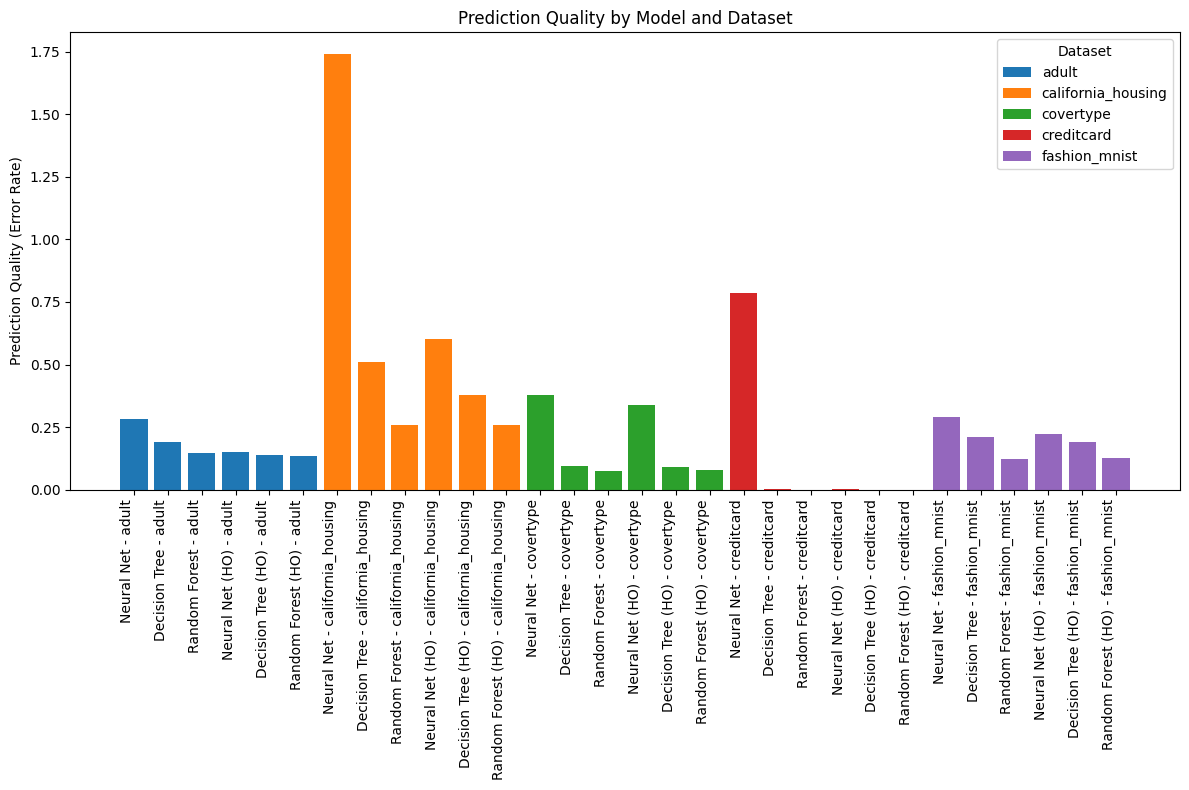

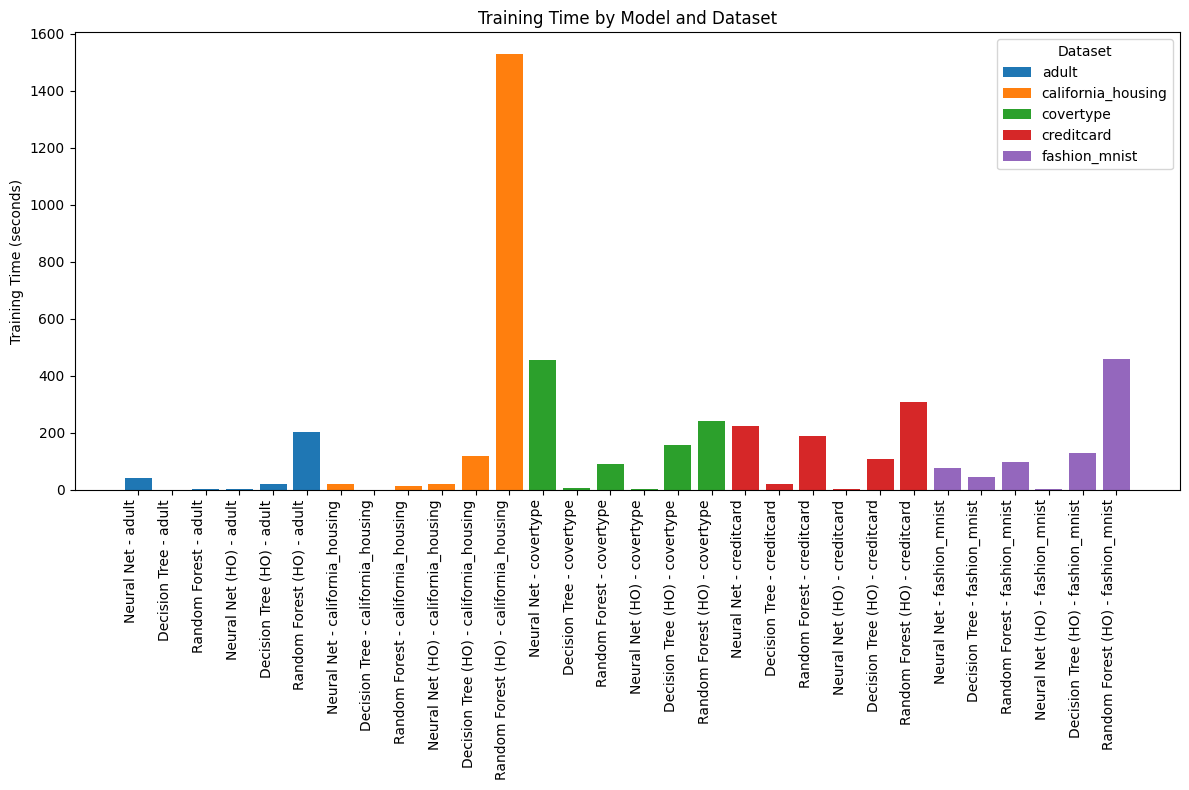

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from final observation table
data = {
    "Dataset": ["adult", "adult", "adult", "adult", "adult", "adult", "california_housing", "california_housing",
                "california_housing", "california_housing", "california_housing", "california_housing", "covertype",
                "covertype", "covertype", "covertype", "covertype", "covertype", "creditcard", "creditcard",
                "creditcard", "creditcard", "creditcard", "creditcard", "fashion_mnist", "fashion_mnist",
                "fashion_mnist", "fashion_mnist", "fashion_mnist", "fashion_mnist"],
    "Model": ["Neural Net", "Decision Tree", "Random Forest", "Neural Net (HO)", "Decision Tree (HO)", "Random Forest (HO)",
              "Neural Net", "Decision Tree", "Random Forest", "Neural Net (HO)", "Decision Tree (HO)", "Random Forest (HO)",
              "Neural Net", "Decision Tree", "Random Forest", "Neural Net (HO)", "Decision Tree (HO)", "Random Forest (HO)",
              "Neural Net", "Decision Tree", "Random Forest", "Neural Net (HO)", "Decision Tree (HO)", "Random Forest (HO)",
              "Neural Net", "Decision Tree", "Random Forest", "Neural Net (HO)", "Decision Tree (HO)", "Random Forest (HO)"],
    "Prediction Quality": [0.2824, 0.1889, 0.1465, 0.1500, 0.1379, 0.1359, 1.7404, 0.5093, 0.2589, 0.6013, 0.3773, 0.2565,
                           0.3792, 0.0945, 0.0756, 0.3399, 0.0887, 0.0790, 0.7854, 0.0009, 0.0003, 0.0016, 0.0005, 0.0003,
                           0.2892, 0.2086, 0.1228, 0.2241, 0.1912, 0.1270],
    "Training Time": [41.1409, 0.3572, 4.0087, 2.2085, 19.6406, 202.1234, 18.1442, 0.1859, 12.2298, 19.7708, 118.0650,
                      1527.7911, 454.1211, 6.9314, 88.3050, 2.0826, 157.2361, 240.6771, 223.2146, 21.0334, 188.6398,
                      2.0884, 105.8048, 307.7530, 75.7479, 44.8531, 96.5708, 2.1049, 129.2666, 456.7982]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot Prediction Quality by Dataset and Model
plt.figure(figsize=(12, 8))
for dataset in df["Dataset"].unique():
    subset = df[df["Dataset"] == dataset]
    plt.bar(subset["Model"] + " - " + subset["Dataset"], subset["Prediction Quality"], label=dataset)
plt.xticks(rotation=90, ha="right")
plt.ylabel("Prediction Quality (Error Rate)")
plt.title("Prediction Quality by Model and Dataset")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

# Plot Training Time by Dataset and Model
plt.figure(figsize=(12, 8))
for dataset in df["Dataset"].unique():
    subset = df[df["Dataset"] == dataset]
    plt.bar(subset["Model"] + " - " + subset["Dataset"], subset["Training Time"], label=dataset)
plt.xticks(rotation=90, ha="right")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time by Model and Dataset")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


###2.Evaluation of Hypothesis(Machine Learning Wisdom and Misconceptions)###

Lets talk it for every Hypothesis mentioned in the start of the assignment:

**Neural networks are the best general classifiers regarding prediction quality (accuracy, error rate, precision, recall, etc.)** :-

This hypothesis is somewhat accurate. Neural networks demonstrated strong performance on complex datasets such as fashion_mnist, showing their strength in handling intricate data patterns. However, on more structured datasets like covertype and creditcard, other models—especially random forests—offered comparable or even better prediction quality.

**Neural networks are time-consuming for training as fitting model parameters is slow and has many hyperparameters**:-

This hypothesis holds true. Neural networks, particularly with hyperparameter optimization, showed notably longer training times, often taking several hundred seconds on large datasets such as covertype and california_housing. Their complexity requires substantial resources and results in slower training compared to decision trees and random forests, supporting the idea that neural networks are time-intensive to fit.

**Random forests are an excellent compromise between classification performance and hyperparameter tuning.They can often provide competitive accuracy without requiring much hyperparameter tuning**

True, Random forests maintained strong performance without extensive tuning, making them reliable across datasets.

**Neural networks are data-hungry and perform poorly in small datasets**

 Performance on the smaller creditcard dataset was limited, indicating that neural networks benefit from larger datasets.

 **Decision trees offer model interpretability but are not competitive in accuracy**

 Yess, according to my observation they show low accurracy.

 **Neural networks are the best models when learning from unstructured data such as images**

 Yess, They performed well on the image dataset as you can see in our observation and evetually show their strength on unstructured data.

 **Random forests are the best models when learning from structured data such as a tabular dataset**

 Yess, I can see that they performed well in tabular data like adult.



##3. Is the hyperparameter optimisation worth the time spent? Did you observe significant improvements in prediction quality?##

Yess , I observed that Hyperparameter optimization provides gave noticeable improvement in the prediction quality but took some training time , for example:-

In the adult dataset, HO reduced to error 0.28 to 0.15 but took long time.
Similarly, In California_housing, the predictive level increases but took so much time at the same time and I also observed that credit_card gain were minor from HO which got me know that balancing techniques are more impactful than optimization alone.

##4.Inference Efficeincy :##

Yess , some model seems to be more effieint for inference for example Decision Tree and random forests because of there simplicity which they have have faster neural networks than multiple layer containing neural networks.

uses if I talk about for Effcient Inference then they are use for quick predictions such as fraud detection even for raipd model iteration which helps in faster upades and optimization


##5. Performance Analysis of Credit Card Dataset##

As we saw for imbalanced credit score,using of confusion matrix and F1 score gave us the better insights than even the error alone because F1 is ideal for class detection like fraud.

Even for the confusion matrix, model like random forect and neural network shows strong recall for class and can detect the fraud and f1 confirms this by acheiving the highest f1 score indicates that good balcnce in detecting true positives while minimizing false positives and negatives.
(This whole i learned from youtube and from lectures slides.)
also Decision tree have the lower F1score indicating the poor handling of imbalance.

##Conclusion:##

Overall analysis shows that neural networks perform exceptionally well on complex data, especially when optimized, but require extensive training time. Random forests strike a good balance between accuracy and efficiency on structured datasets, while decision trees offer rapid training but lower accuracy for intricate tasks. Hyperparameter optimization significantly improves model performance but is resource-intensive. For imbalanced datasets, F1 scores provide more informative insights than error rates. Both efficient inference and training times are essential for real-world applications, underscoring the importance of selecting and optimizing models based on the specific data and task needs.

Use one or more cell here to write your report.